### Run the following cell to install the required libraries

In [1]:
!pip install scikit-learn
!pip install scipy
!pip install matplotlib

### In this notebook, we'll see how to use KNN to classify the IRIS Flowers.
### Complete information on dataset is available here https://archive.ics.uci.edu/ml/datasets/iris

### Loading and exploring the dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()
# print the whole array of observations
print(iris_dataset.data[:5])
print(type(iris_dataset.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'>


In [4]:
# print the target values and names
print(iris_dataset.target)
print(type(iris_dataset.target))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>


In [5]:
# get the names of all flowers in the iris data set
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# setosa = 0, versicolor = 1, virginica = 2
# to test if number of observations is equal to the number of target values
# we are using shape here to get dimensions of numpy arrays data and target
print(iris_dataset.data.shape[0] == iris_dataset.target.shape[0])

True


### Applying KNN on our IRIS Dataset

In [7]:
# importing Knn
from sklearn.neighbors import KNeighborsClassifier

# creating an instance of Knn
knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
# X is the data and y is the target
X = iris_dataset.data
y = iris_dataset.target

### Separate our dataset into train and test groups

In [9]:
from sklearn.model_selection import train_test_split
# create training and testing variable
# the values are splitted into train and test randomly
# not like first 70% for training and last 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # test_size=0.30 means 30% data to be used for testing

In [10]:
# fit the knn model on our training data
knn.fit(X_train, y_train)
# predict the response for test dataset
predictions = knn.predict(X_test)

In [11]:
# calculate the accuracy of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy = {}".format(accuracy))
print("Accuracy(%) = {:.4f}".format(accuracy*100)) # rounded off to 4 decimal places

Accuracy = 0.9777777777777777
Accuracy(%) = 97.7778


In [12]:
# we know that first 50 observations are setosa(index=0), next 50 are versicolor(index=1) and last 50 are virginica(index=2)
# so let's try some predictions
pred = knn.predict([X[105]])
print(pred)

[2]


In [13]:
# we can get the name of the flower by using the pred and using it as an index on iris_dataset.target_names
print(iris_dataset.target_names[pred])

['virginica']


In [14]:
# inititally we use n_neighbours = 1 i.e k = 1
# we don't know which K value can bring the best accuracy so we'll try different k_values to see which one gives the best accuracy
# we'll use a for loop to try different k_values
# we'll use a dictionary, where k is the key and accuracy is the value

results = {}

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    results[k] = round(accuracy*100, 4) # get accuracy in percentage, round off to 4 decimal places

sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for k, acc in sorted_results.items():
    print("Accuracy = {}% for K = {},".format(acc, k))
    

Accuracy = 100.0% for K = 8,
Accuracy = 100.0% for K = 9,
Accuracy = 100.0% for K = 10,
Accuracy = 97.7778% for K = 1,
Accuracy = 97.7778% for K = 2,
Accuracy = 97.7778% for K = 3,
Accuracy = 97.7778% for K = 4,
Accuracy = 97.7778% for K = 5,
Accuracy = 97.7778% for K = 6,
Accuracy = 97.7778% for K = 11,
Accuracy = 97.7778% for K = 12,
Accuracy = 97.7778% for K = 13,
Accuracy = 97.7778% for K = 17,
Accuracy = 97.7778% for K = 18,
Accuracy = 97.7778% for K = 19,
Accuracy = 95.5556% for K = 7,
Accuracy = 95.5556% for K = 14,
Accuracy = 95.5556% for K = 15,
Accuracy = 95.5556% for K = 16,
Accuracy = 95.5556% for K = 23,
Accuracy = 93.3333% for K = 20,
Accuracy = 93.3333% for K = 21,
Accuracy = 93.3333% for K = 22,
Accuracy = 93.3333% for K = 24,
Accuracy = 93.3333% for K = 25,


### Now let's Plot the K values and accuracy

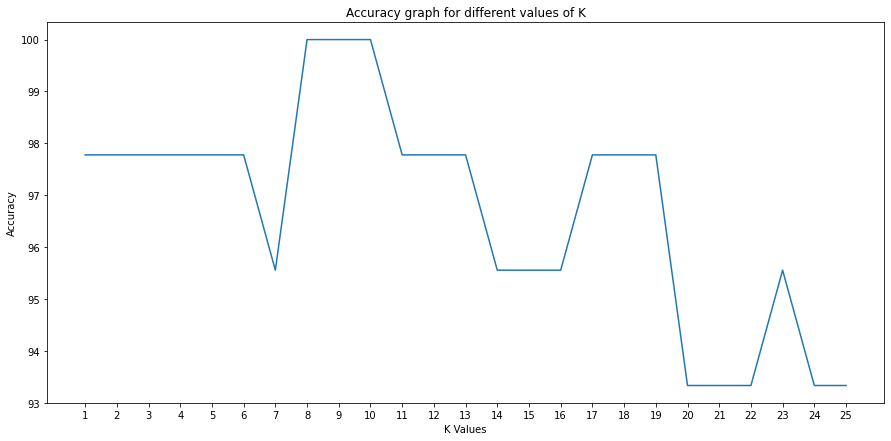

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(list(results.keys()), list(results.values()))
plt.title("Accuracy graph for different values of K")
plt.xticks(list(results.keys()))
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()